In [1]:
import ipywidgets as widgets

In [2]:
widgets.IntSlider()

IntSlider(value=0)

In [3]:
from IPython.display import display
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [4]:
display(w)

IntSlider(value=0)

In [5]:
w.value

0

In [6]:
a = widgets.FloatText()
b = widgets.FloatSlider()
display(a,b)

mylink = widgets.jslink((a, 'value'), (b, 'value'))

FloatText(value=0.0)

FloatSlider(value=0.0)

In [7]:
progress = widgets.IntProgress(
    value=33,
    min=0,
    max=100,
    description='Loading:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    style={'bar_color': 'maroon'},
    orientation='horizontal'
)

In [8]:
display(progress)

IntProgress(value=33, description='Loading:', style=ProgressStyle(bar_color='maroon'))

In [9]:
import time

In [10]:
for i in range(100):
    time.sleep(0.01)
    progress.value = i

In [11]:
widgets.Box(
    [
        widgets.Label(value='Pizza topping with a very long label:'), 
        widgets.RadioButtons(
            options=[
                'pepperoni', 
                'pineapple', 
                'anchovies', 
                'and the long name that will fit fine and the long name that will fit fine and the long name that will fit fine '
            ],
            layout={'width': 'max-content'}
        )
    ]
)

Box(children=(Label(value='Pizza topping with a very long label:'), RadioButtons(layout=Layout(width='max-cont…

In [12]:
widgets.Text(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=True   
)

Text(value='Hello World', description='String:', disabled=True, placeholder='Type something')

In [13]:
widgets.HBox([widgets.Label(value="The $m$ in $E=mc^2$:"), widgets.FloatSlider()])

In [14]:
play = widgets.Play(
    value=50,
    min=0,
    max=100,
    step=1,
    interval=50,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

In [15]:
tags = widgets.TagsInput(
    value=['pizza', 'fries'],
    allowed_tags=['pizza', 'fries', 'tomatoes', 'steak'],
    allow_duplicates=False
)
tags

TagsInput(value=['pizza', 'fries'], allow_duplicates=False, allowed_tags=['pizza', 'fries', 'tomatoes', 'steak…

In [16]:
out = widgets.Output(layout={'border': '1px solid black'})
out

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

In [17]:
with out:
    out.clear_output()
    for i in range(10):
        print(i, 'Hello world!')
    print ('Hello world!')

In [18]:
a = widgets.IntSlider(description='a')
b = widgets.IntSlider(description='b')
c = widgets.IntSlider(description='c')
def f(a, b, c):
    print('{}*{}*{}={}'.format(a, b, c, a*b*c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

widgets.HBox([widgets.VBox([a, b, c]), out])

In [19]:
from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        print("Button clicked.")

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

Output()

In [20]:
# Matrix filling
def MatrixFiller(targetMatrix, n):
    matrix = []
    for i in range(n):
        row = []
        for j in range(n):
            text = widgets.FloatText(
                value='0',
                placeholder='Type something',
                disabled=False,
                layout=widgets.Layout(width='50px')
            )
            def on_value_change(change):
                targetMatrix[i][j] = change['new']
                print(targetMatrix)

            text.observe(on_value_change, names='value')
            row.append(text)
        matrix.append(row)
    return matrix

n = 3
target = [[0 for i in range(n)] for j in range(n)]
matrix = MatrixFiller(target, n)
display(widgets.VBox([widgets.HBox(row) for row in matrix]))

In [21]:
import Classes.EditableMatrix as em

In [22]:
matrix = em.EditableMatrix(3, 3, output=out)

In [23]:
display(matrix.get_widget())

GridBox(children=(Label(value=''), HBox(children=(Button(icon='minus-square', layout=Layout(height='40px', mar…

In [24]:
out

Output(outputs=({'name': 'stdout', 'text': '0*0*0=0\n', 'output_type': 'stream'},))

In [25]:
import matplotlib.pyplot as plt

In [26]:
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]

display(out)

with out:
    for _ in range(5):
        out.clear_output()
        fig, ax = plt.subplots()
        ax.plot(x, y)
        plt.show()
        x.append(5)
        y.append(40)
        time.sleep(1)

Output(outputs=({'name': 'stdout', 'text': '0*0*0=0\n', 'output_type': 'stream'},))

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

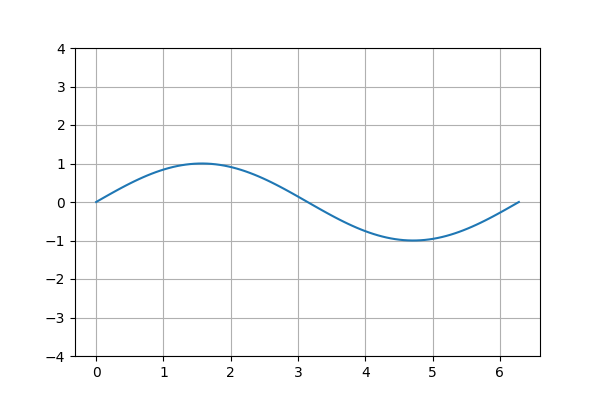

In [31]:
import numpy as np

%matplotlib widget

# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)
 
 
def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))
 
 
@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')

IntSlider(value=1, continuous_update=False, description='$\\omega$', max=10)

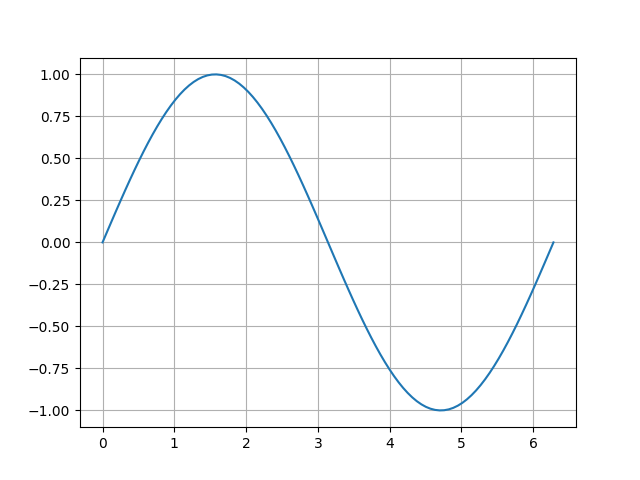

In [32]:
x = np.linspace(0, 2 * np.pi, 100)
 
fig, ax = plt.subplots()
line, = ax.plot(x, np.sin(x))
ax.grid(True)
 
def update(change):
    line.set_ydata(np.sin(change.new * x))
    fig.canvas.draw()
     
int_slider = widgets.IntSlider(
    value=1, 
    min=0, max=10, step=1,
    description='$\omega$',
    continuous_update=False
)
int_slider.observe(update, 'value')
int_slider

Button(description='Add Node', style=ButtonStyle())

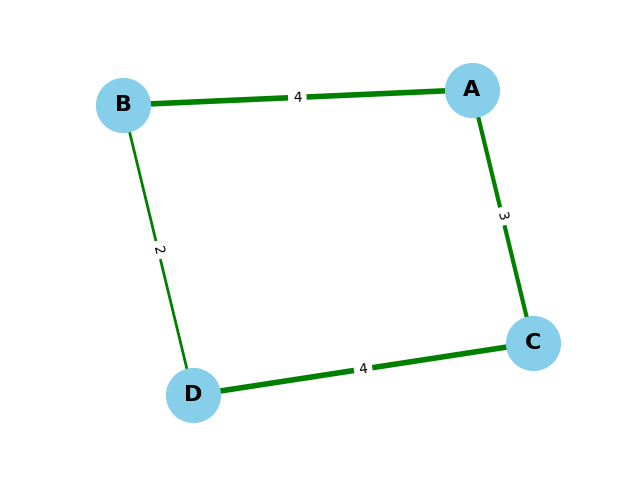

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()

G = nx.Graph()
G.add_edge('A', 'B', weight=4)
G.add_edge('B', 'D', weight=2)
G.add_edge('A', 'C', weight=3)
G.add_edge('C', 'D', weight=4)

pos = nx.spring_layout(G)
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos, ax=ax1, with_labels=True, node_color='skyblue', node_size=1500, edgelist=edges, edge_color='g', width=weights, font_size=16, font_color='black', font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v):G[u][v]['weight'] for u,v in edges})

def addRandomNode():
    ax1.clear()
    G.add_node('E')
    G.add_edge('E', 'A', weight=1)
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = [G[u][v]['weight'] for u,v in edges]
    nx.draw(G, pos, ax=ax1, with_labels=True, node_color='skyblue', node_size=1500, edgelist=edges, edge_color='g', width=weights, font_size=16, font_color='black', font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v):G[u][v]['weight'] for u,v in edges})

button = widgets.Button(description="Add Node")
button.on_click(lambda x: addRandomNode())
display(button)
plt.show()

In [30]:
from Classes.EditableGames import EditableGames

games = EditableGames(5)
display(games.get_widget())